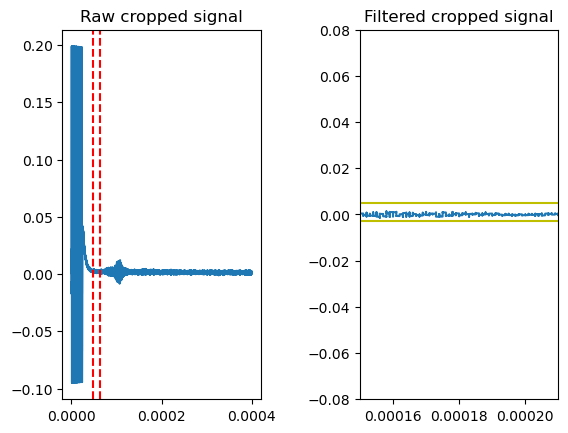

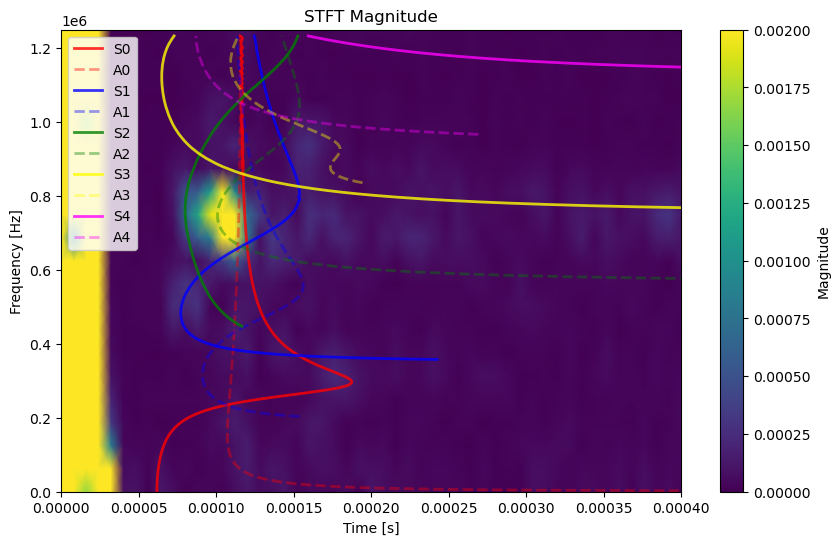

Framesize = 10000 samples
Hopsize = 5000.0 samples
Number of frames = 51.0
Frequency resoution = 62500.0 Hz
Time resolution = 8e-06 seconds
Maxiumum Frequency = 312500000.0 Hz
Number of frequency values = 5001.0
Number of samples 250000
Sampling rate = 625000000.0 samples per second


In [12]:
# Program for identification of lamb wave modes present within a signal.
# [Written by Marcel Szczech during URSS project on lamb wave mode isolation]

                                   ########## What does this program do and why? ##########
# Carries out the short-time Fourier transform (STFT) of a raw signal, and overlays the theoretical arrival times of possible 
# lamb wave modes as a function of frequency on the frequency-time plane of the STFT heatmap. What modes are in the raw signal can then
# be checked by eye; the 'bright regions' of the STFT will coincide with particular points of the frequency vs arrival time lines for
# possible modes.

                                     ########## IMORTANT NOTE ABOUT STFT THEORY ##########
# Read the 'stft testing' program for the details behind the STFT! There is some nuance behind choosing parameters like framesize.
# I won't restate the definition of parameters here.

                                            ########## The program itself ##########

# Importing libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft
from scipy.signal import butter, filtfilt, sosfiltfilt



# First read in the raw amplitude vs. time data of the signal. Replace the file name with whatever the signal file is called.
# This assumes that the signal file has its time data in the first column, and its amplitude data in the second column, and that the two 
# columns are seperated by an arbitrary number of spaces (not any punctuation). There shouldn't be any strings anywhere or any 
# punctuation at the end of the rows.

amp_raw = np.loadtxt("0.74 MHz S2.txt", usecols=1)
time_raw = np.loadtxt("0.74 MHz S2.txt", usecols=0)



# Band pass filter function definition for filtering out very high or very low frequencies in the raw signal.

def bandpass_filter(signal, fs, lowcut=25000, highcut=2000000, order=4):
    sos = butter(order, [lowcut, highcut], btype='bandpass', fs=fs, output='sos')
    filtered = sosfiltfilt(sos, signal)
    return filtered


# listing parameters of the STFT and raw signal. Framesize and hopsize are FREE PARAMETERS; everything else is defined based on these 
# and the sampling frequency which is a property of the raw signal itself. Again, look at 'stft testing' for details about these.

framesize = 1*10000
hopsize = 0.5*framesize

sample_number = len(time_raw) # The number of data points within the raw signal
sampling_rate = sample_number / (time_raw[-1] - time_raw[0]) # The number of data points per unit time in the raw signal

# Quickly define a function for converting intervals of a signal in units of points to units of time; it is more intuitive to think of 
# hopsize, framesize etc. in time rather than number of data points for clarity. 

def dT(dN):
    return dN / sampling_rate

# Continue listing useful parameters of the stft and raw signal, which may be printed.

overlap = framesize - hopsize

frequency_bins = (framesize / 2) + 1
frame_number = ( ( sample_number-framesize )/(hopsize) ) + 1 + 2

frequency_max = sampling_rate / 2

frequency_res = frequency_max / (frequency_bins - 1)
time_res = dT(hopsize)



# Cropping the raw signal if need be. Insert the time you want your signal to be considered from; start_idx is calculated as the number of 
# data points within a 'crop_start' time interval given the sampling rate, truncated to an integer number of data points just in case 
# this ends up being a decimal.

crop_start = 0.0000
start_idx = int(crop_start * sampling_rate)

# cropped raw signal amplitude values
cropped_amp_raw = amp_raw[start_idx:]

# cropped filtered signal amplitude values; first a bandpass filter is applied onto the uncropped raw signal, then the filtered signal 
# is cropped.
amp_filtered = bandpass_filter(amp_raw, sampling_rate, lowcut=25000, highcut=2000000)
cropped_amp = amp_filtered[start_idx:]

# cropped time domain
cropped_time = time_raw[start_idx:]



# Plotting the cropped raw signal and cropped filtered signal.

figure, axis = plt.subplots(1, 2) # Make a graph layout with one row and 2 columns.
figure.subplots_adjust(wspace=0.5, hspace=5)


# Raw cropped signal; column 1 row 1 of the graph layout.
axis[0].plot(cropped_time, cropped_amp_raw)
axis[0].set_title("Raw cropped signal")

# Plotting the frame boundaries on the raw signal, for the Nth frame
N=8
axis[0].axvline(x=(N)*dT(hopsize), color='r', linestyle='--')
axis[0].axvline(x=(N-2)*dT(hopsize), color='r', linestyle='--')

#Focus on a specific part of the signal if you like. Comment out/adjust as needed.
plt.ylim([0,0.05])
plt.xlim([0.00015,0.00021])



# Filtered Signal; column 2 row 1 of the graph layout.

axis[1].plot(cropped_time, cropped_amp)
axis[1].set_title("Filtered cropped signal")

# Plotting the frame boundaries on the raw signal, for the Nth frame
axis[1].axvline(x=(N)*dT(hopsize), color='r', linestyle='--')
axis[1].axvline(x=(N-2)*dT(hopsize), color='r', linestyle='--')

# Plotting horizontal cursors so you can more easily read amplitudes
axis[1].axhline(y=0.005, color='y')
axis[1].axhline(y=-0.003,color='y')

# Focus on a specific part if you like
plt.ylim([-0.08,0.08])
plt.xlim([0.00015,0.00021])



# Reading in the group velocity vs. frequency-thickness data for symmetric and antisymmetric lamb wave modes up to 4th order, for the 
# frequency thickness domain [0, 10] MHz mm. 
# Obtained from Prof. Rachel Edwards.

cg_S0 = np.loadtxt("Calculated group velocity curves.txt", delimiter=',', usecols=6)
cg_A0 = np.loadtxt("Calculated group velocity curves.txt", delimiter=',', usecols=1)

cg_S1 = np.loadtxt("Calculated group velocity curves.txt", delimiter=',', usecols=7)
cg_A1 = np.loadtxt("Calculated group velocity curves.txt", delimiter=',', usecols=2)

cg_S2 = np.loadtxt("Calculated group velocity curves.txt", delimiter=',', usecols=8)
cg_A2 = np.loadtxt("Calculated group velocity curves.txt", delimiter=',', usecols=3)

cg_S3 = np.loadtxt("Calculated group velocity curves.txt", delimiter=',', usecols=9)
cg_A3 = np.loadtxt("Calculated group velocity curves.txt", delimiter=',', usecols=4)

cg_S4 = np.loadtxt("Calculated group velocity curves.txt", delimiter=',', usecols=10)
cg_A4 = np.loadtxt("Calculated group velocity curves.txt", delimiter=',', usecols=5)

fd = np.loadtxt("Calculated group velocity curves.txt", delimiter=',', usecols=0) * 10**(6) # The frequency-thickness values in MHz mm


# transforming the frequency-thickness axis to a frequency axis given a particular plate thickness. In Hz since fd is in Hz mm.
thickness = 8.109 # in mm
frequency = fd / thickness # in Hz

# emitter-reciever distance in metres. 
s = 0.33

# time taken for each mode to travel this distance, for frequency thicknesses [0, 10] MHz mm. Accounts for the crop_start, so that
# crop_start is treated as the time at which wave begin propagating from the emitter array.

t_S0 = (s/cg_S0) - crop_start
t_A0 = (s/cg_A0) - crop_start

t_S1 = (s/cg_S1) - crop_start
t_A1 = (s/cg_A1) - crop_start

t_S2 = (s/cg_S2) - crop_start
t_A2 = (s/cg_A2) - crop_start

t_S3 = (s/cg_S3) - crop_start
t_A3 = (s/cg_A3) - crop_start

t_S4 = (s/cg_S4) - crop_start
t_A4 = (s/cg_A4) - crop_start



# The STFT of the filtered signal with the selected framesize and hopsize. The exact nature of f, t and Zxx are described in the 
# 'stft testing' program as:
# -> f is the array of frequency values for which complex fourier coefficients are calculated for in the DFT of a frame.
# -> t is the array of centre times of the frames.
# -> Zxx is a 2D array, where the complex fourier coefficients for a particular frequency are stored as a function of time; the first 
# axis sweeps through frequencies, from 0 onwards to 'frequencymax', the second axis sweeps through frame centre times.   

f, t, Zxx = stft(cropped_amp, fs=sampling_rate, window='hann', nperseg=framesize, noverlap=overlap)



# Plotting the STFT magnitude as a heatmap on the frequency-time plane.

# STFT heatmap
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud',vmin=0, vmax=0.002) # Make sure vmax, the value to which the 'brightest' colour is
                                                                        # assigned, is appropriate to avoid too high/low sensitivity
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.colorbar(label='Magnitude')

# Focus on a specific part if you like
plt.ylim(0, 1250000)
plt.xlim(crop_start, time_raw[-1]) 


# overlayed arrival time curves up to 4 modes, for a given thickness plate

plt.plot(t_S0, frequency, color='red', linewidth=2, alpha=0.8 ,label='S0')
plt.plot(t_A0, frequency, color='red', linewidth=2, alpha=0.4, linestyle='--', label='A0')

plt.plot(t_S1, frequency, color='blue', linewidth=2, alpha=0.8 ,label='S1')
plt.plot(t_A1, frequency, color='blue', linewidth=2, alpha=0.4, linestyle='--', label='A1')

plt.plot(t_S2, frequency, color='green', linewidth=2, alpha=0.8 ,label='S2')
plt.plot(t_A2, frequency, color='green', linewidth=2, alpha=0.4, linestyle='--', label='A2')

plt.plot(t_S3, frequency, color='yellow', linewidth=2, alpha=0.8 ,label='S3')
plt.plot(t_A3, frequency, color='yellow', linewidth=2, alpha=0.4, linestyle='--', label='A3')

plt.plot(t_S4, frequency, color='magenta', linewidth=2, alpha=0.8 ,label='S4')
plt.plot(t_A4, frequency, color='magenta', linewidth=2, alpha=0.4, linestyle='--', label='A4')

plt.legend()
plt.show()


# Printing parameters for clarity

print("Framesize =", framesize, "samples")
print("Hopsize =", hopsize, "samples")
print("Number of frames =", frame_number)

print("Frequency resoution =", frequency_res, "Hz")
print("Time resolution =", dT(hopsize), "seconds")

print("Maxiumum Frequency =", frequency_max, "Hz")
print("Number of frequency values =", frequency_bins)

print("Number of samples", sample_number)
print("Sampling rate =", sampling_rate, "samples per second")

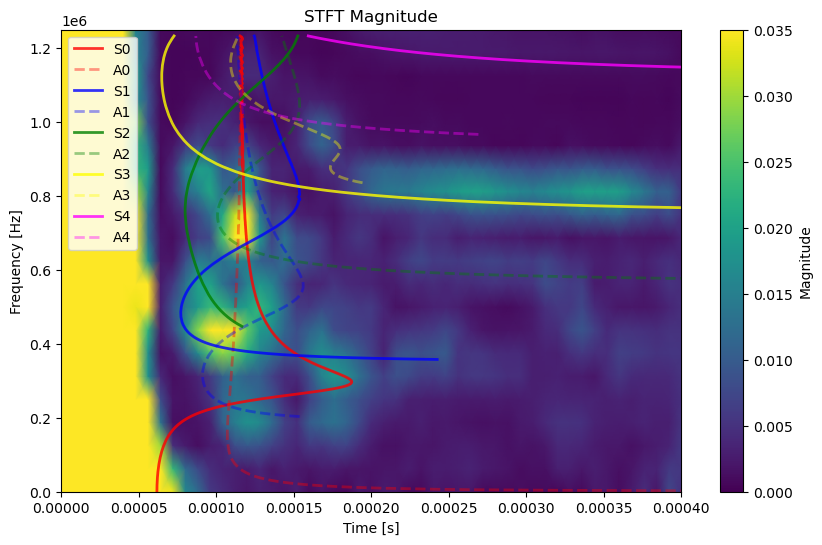

In [14]:
# Program that adds multiple STFTs together onto one sonogram
# [Written by Marcel Szczech during URSS project on lamb wave mode isolation]

                                     ########## What does this program do and why? ##########
# This program takes the STFT heatmaps of several signals within a folder, and adds them all together. The program was intended to be
# used as a method of comparing what modes are excited for A RANGE of driving signal frequencies to what is predicted at various 
# frequencies by theory.

                                           ##########  The program itself ##########
import os

# It goes through all of the raw signal .txt files in a directory specified by the 'folder' string; define the folder in which the raw 
# signal amplitude-time .txt files are kept. MAKE SURE THE ONLY .TXT FILES IN THIS FOLDER ARE SIGNAL DATA FILES YOU WANT.
folder = 'C:/Users/vbn-v/Documents/URSS/Graphs and pictures/Experimental Heatmaps/~8.109mm plate/8000ns'

# Define the array which will hold all the resulting fourier coefficients, for every time and frequency, after we add all the individual 
# STFTs together. This is the same shape as the STFT fourier coefficient array which can be printed from the above cell, which was a 
# program for the STFT of one signal.

STFT_array = np.zeros((5001,51))

# Loop over the files in the specified directory/folder
for file in os.listdir(folder):
    
    # Only act on files that are .txt files
    if file.endswith('.txt'):

        filepath = os.path.join(folder, file)

        # Store the amplitude and time values of the current signal into two seperate arrays
        # This assumes the signal data files are of the form described in the program for the STFT of one signal, in the cell above
        
        AMP_raw = np.loadtxt(filepath, usecols=1)
        TIME_raw = np.loadtxt(filepath, usecols=0)

        # Define some STFT parameters before we actually take the STFT of the signal given by the current file (taken from the above cell 
        # for the STFT of a single signal)
        FRAMESIZE = 1*10000
        HOPSIZE = 0.5*framesize

        SAMPLE_NUMBER = len(TIME_raw) # The number of data points within the raw signal
        SAMPLING_RATE = SAMPLE_NUMBER / (TIME_raw[-1] - TIME_raw[0]) # The number of data points per unit time in the raw signal

        # Quickly define a function for converting from sample intervals to time intervals; it is more intuitive to think of hopsize, 
        # framesize etc. in time rather than number of data points for clarity. 
        def dT(dN):
            return dN / SAMPLING_RATE

        # Continue listing useful parameters of the stft and raw signal which may be printed.
        OVERLAP = FRAMESIZE - HOPSIZE

        FREQUENCY_BINS = (FRAMESIZE / 2) + 1
        FRAME_NUMBER = ( ( SAMPLE_NUMBER-FRAMESIZE )/(HOPSIZE) ) + 1 + 2

        FREQUENCY_MAX = SAMPLING_RATE / 2

        FREQUENCY_RES = FREQUENCY_MAX / (FREQUENCY_BINS - 1)
        TIME_RES = dT(HOPSIZE)

        # Cropping the raw signal if need be. Insert the time you want your signal to be considered from; start_idx is calculated as the number of data points within a 
        # 'crop_start' time interval given the sampling rate, truncated to an integer number of data points just in case this ends up being a decimal.
        CROP_START = 0.0000
        START_IDX = int(CROP_START * SAMPLING_RATE)

        # cropped raw signal values
        CROPPED_AMP_RAW = AMP_raw[START_IDX:]

        # cropped filtered signal values; first a bandpass filter is applied onto the uncropped raw signal, then the filtered signal is cropped.
        AMP_filtered = bandpass_filter(AMP_raw, SAMPLING_RATE, lowcut=25000, highcut=2000000)
        CROPPED_amp = AMP_filtered[START_IDX:]

        # cropped time domain
        CROPPED_time = TIME_raw[START_IDX:]

        # Take the STFT of the signal of the current file, and store it in an array called 'ZXX'
        F, T, ZXX = stft(CROPPED_amp, fs=SAMPLING_RATE, window='hann', nperseg=FRAMESIZE, noverlap=OVERLAP)

        # Add the absolute value of the current file's fourier coefficient array to the STFT_array
        STFT_array = STFT_array + np.abs(ZXX)

        # The loop will now repeat this whole process for the next .txt file in the folder, and eventually 'STFT_array' will hold the 
        # |STFTs| of all the signals in the specified folder added together.


# Now, plot the combined STFT of all the signals in the files

plt.figure(figsize=(10, 6))
plt.pcolormesh(T, F, STFT_array, shading='gouraud',vmin=0, vmax=0.035) # Remember to set vmax, the value assigned to the 'brightest' 
                                                                       # colour, appropriately.
                                                                        
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.colorbar(label='Magnitude')

# Focus on a specific part if you like
plt.ylim(0, 1250000)
plt.xlim(CROP_START, time_raw[-1])

# overlayed arrival time curves up to 4 modes, for a given thickness plate. 
# REMEMBER THE THICKNESS OF THE PLATE IS DEFINED IN THE ABOVE CELL

plt.plot(t_S0, frequency, color='red', linewidth=2, alpha=0.8 ,label='S0')
plt.plot(t_A0, frequency, color='red', linewidth=2, alpha=0.4, linestyle='--', label='A0')

plt.plot(t_S1, frequency, color='blue', linewidth=2, alpha=0.8 ,label='S1')
plt.plot(t_A1, frequency, color='blue', linewidth=2, alpha=0.4, linestyle='--', label='A1')

plt.plot(t_S2, frequency, color='green', linewidth=2, alpha=0.8 ,label='S2')
plt.plot(t_A2, frequency, color='green', linewidth=2, alpha=0.4, linestyle='--', label='A2')

plt.plot(t_S3, frequency, color='yellow', linewidth=2, alpha=0.8 ,label='S3')
plt.plot(t_A3, frequency, color='yellow', linewidth=2, alpha=0.4, linestyle='--', label='A3')

plt.plot(t_S4, frequency, color='magenta', linewidth=2, alpha=0.8 ,label='S4')
plt.plot(t_A4, frequency, color='magenta', linewidth=2, alpha=0.4, linestyle='--', label='A4')

plt.legend()
plt.show()
